In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 6: Decision trees

In [4]:
# Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform
# both classification and regression tasks, and even multioutput tasks. They are
# very powerful algorithms, capable of fitting complex datasets.

In [5]:
# implementing ..
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [41]:
# You can visualize the trained Decision Tree by first using the export_graphviz()
# method to output a graph definition file called iris_tree.dot:
from sklearn.tree import export_graphviz
from PIL import Image
# export_graphviz(
#     tree_clf,
#     out_file=image_path("iris_tree.dot"),
#     feature_names=iris.feature_names[2:],
#     class_names=iris.target_names,
#     rounded=True,
#     filled=True
# )

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "D:\material\Current"
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [43]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return os.path.join(IMAGES_PATH, fig_id)

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [44]:
# check at the directory mentioned above
# check out page->179 for the diagram
# One of the many qualities of Decision Trees is that they require
# very little data preparation. In particular, they don’t require feature
# scaling or centering at all.

In [46]:
# white box models -- decision trees... 
# black box models -- neural network
# difference is on page-> 181
# simple diff is that we don't know in black box what contributed to the prediction whereas
# in while box models like decision trees we know as it is simply defined.. as you see in image.. se page->179

In [48]:
tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[0.        , 0.90740741, 0.09259259]]), array([1]))

## the cart training algorithm

In [50]:
# page->182

In [52]:
# Scikit-Learn can speed up
# training by presorting the data (set presort=True), but this slows down training considerably
# for larger training sets.
# page->183

# So should you use Gini impurity or entropy? The truth is, most of the time it does not
# make a big difference: they lead to similar trees. Gini impurity is slightly faster to
# compute, so it is a good default. However, when they differ, Gini impurity tends to
# isolate the most frequent class in its own branch of the tree, while entropy tends to
# produce slightly more balanced trees.5
# page->184

## regularization hyperparameters

In [56]:
# max_depth .. when set None means unlimited.. 
# reducing max_depth will regularize the model and thus reduce the risk of overfitting

# min_samples_leaf(the minimum no of samples a leaf node must have)

#min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction 
# of the total number of weighted instances)

# max_leaf_nodes (maximum number of leaf nodes), and max_features
# (maximum number of features that are evaluated for splitting at each node). Increasing
# min_* hyperparameters or reducing max_* hyperparameters will regularize the
# model.

# regression

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

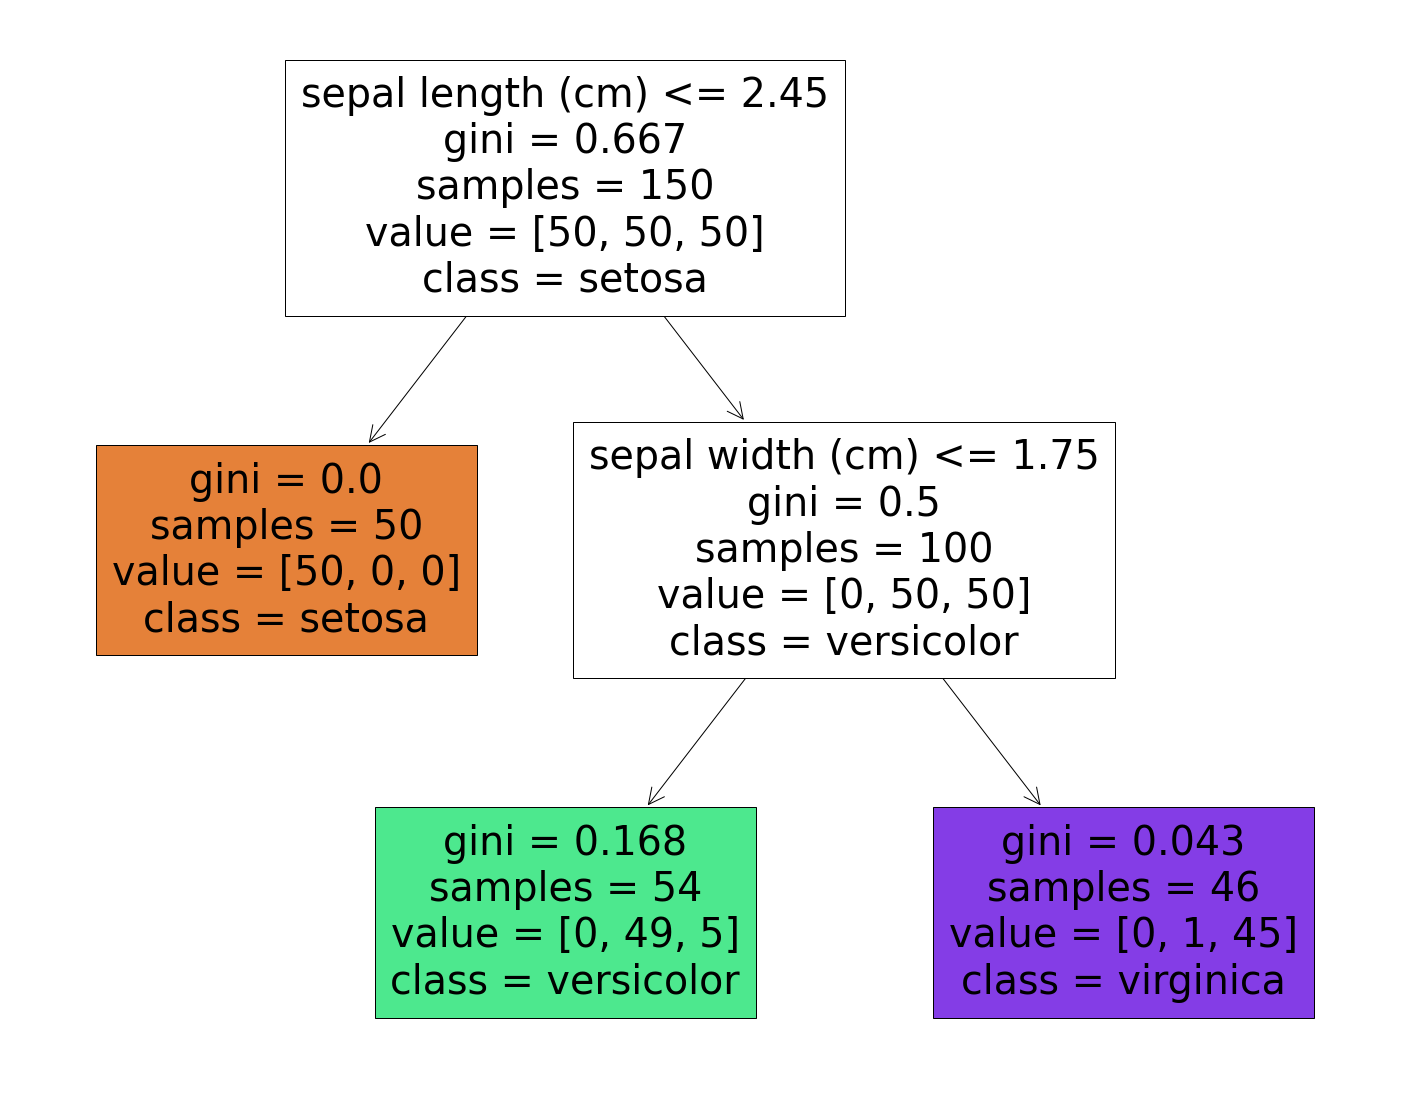

In [63]:
# for visualisation
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
# the above one is for iris one ig... 

In [64]:
# for decision tree of the regression one page->186

In [65]:
# Just like for classification tasks, Decision Trees are prone to overfitting when dealing
# with regression tasks. Without any regularization (i.e., using the default hyperparameters),
# you get the predictions on the left of Figure 6-6. It is obviously overfitting
# the training set very badly. Just setting min_samples_leaf=10 results in a much more
# reasonable model,
# page->187

# More generally, the main issue with Decision Trees is that they are very sensitive to
# small variations in the training data. For example, if you just remove the widest Iris-
# Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
# and train a new Decision Tree, you may get the model represented in Figure 6-8. As
# you can see, it looks very different from the previous Decision Tree (Figure 6-2).
# Actually, since the training algorithm used by Scikit-Learn is stochastic6 you may
# get very different models even on the same training data (unless you set the
# random_state hyperparameter).

# Random Forests can limit this instability by averaging predictions over many trees, as
# we will see in the next chapter.